In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# csv 파일을 로딩
df = pd.read_csv("c:/data/wine/wine_new.csv")
# 데이터의 컬럼명 변경
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


# 이진분류

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

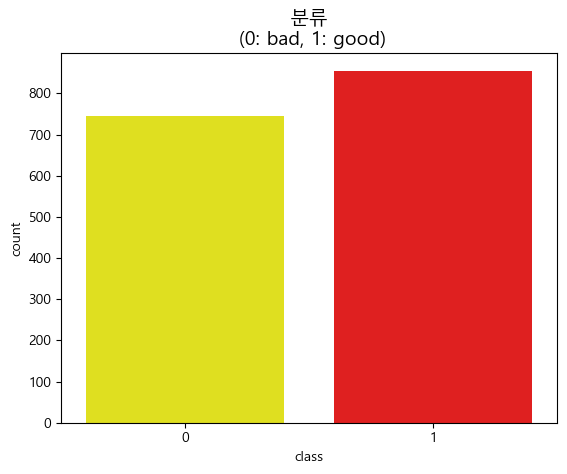

In [3]:
import seaborn as sns

colors = ["yellow", "red"]
sns.countplot('class', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)
# 불균형 데이터셋

In [4]:
train_cols = df.columns[0:11] # 0~10 필드
print(train_cols)
X = df[train_cols] # 독립변수
y = df["class"]
print(df[train_cols].head())
print(y.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34

In [5]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

0    744
1    744
Name: class, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

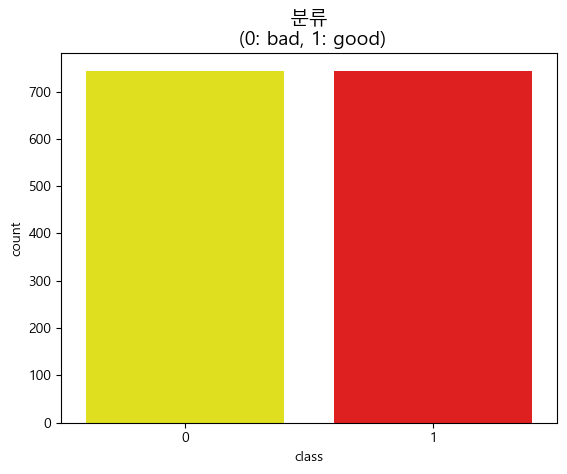

In [6]:
colors = ["yellow", "red"]
sns.countplot('class', data=df2, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [7]:
train_cols = df.columns[0:11] # 0~10 필드
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [8]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())
# 모델의 설명력 25.4%
# 유의하지 않은 변수들 확인
# fixed acidity, residual sugar, pH
# 상관관계 : density(-) > chlorides(-) > volatile acidity(-) > sulphates(+)
# 도수 > 염화물 > 휘발성 산도 > 황산염

Optimization terminated successfully.
         Current function value: 0.517020
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 1488
Model:                          Logit   Df Residuals:                     1477
Method:                           MLE   Df Model:                           10
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.2541
Time:                        12:01:55   Log-Likelihood:                -769.33
converged:                       True   LL-Null:                       -1031.4
Covariance Type:            nonrobust   LLR p-value:                3.030e-106
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0980      0.065      1.501      0.133      -0.030       0.226

In [9]:
# pvalue가 0.05보다 큰 값들을 제거
cols=['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X = X_samp[cols]
y = y_samp['class']
df2 = pd.concat([X,y],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.7453781512605042
검증용: 0.7483221476510067


In [11]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[122,  39],
       [ 36, 101]], dtype=int64)

In [12]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,122,39
1,36,101


<AxesSubplot:title={'center':'Confusion Matrix'}>

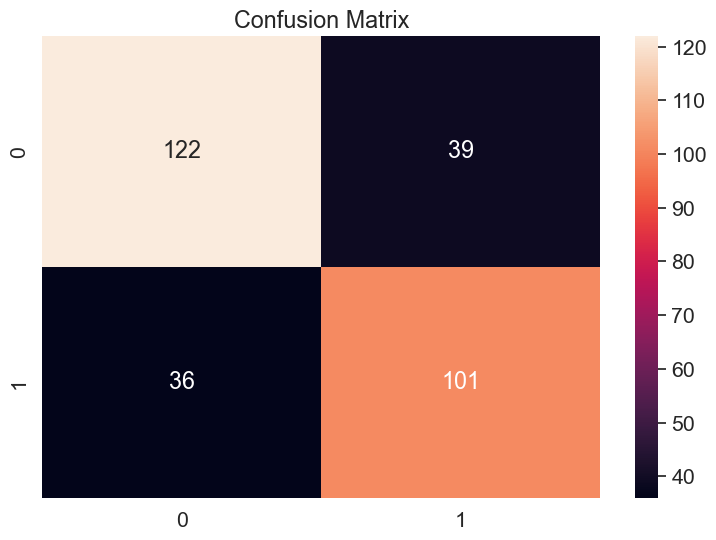

In [13]:
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

# 다분류

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (3 ~ 8)')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


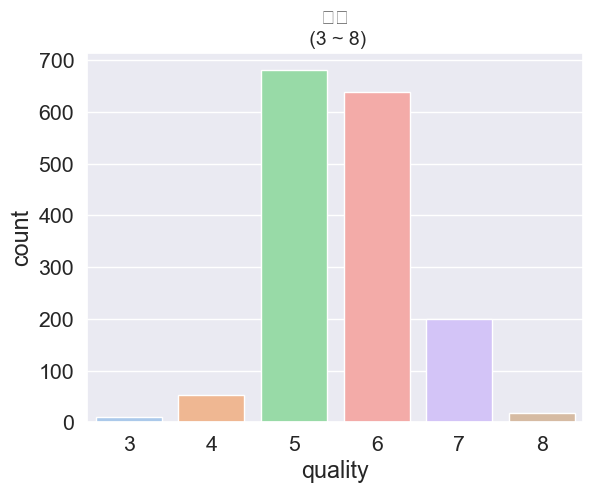

In [14]:
import seaborn as sns

sns.countplot('quality', data=df, palette="pastel")
plt.title('분류\n (3 ~ 8)', fontsize=14)
# 불균형 데이터셋

In [15]:
train_cols = df.columns[0:11] # 0~10 필드
print(train_cols)
X = df[train_cols] # 독립변수
y = df["quality"]
print(df[train_cols].head())
print(y.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34

In [16]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['quality'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["quality"].value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

In [17]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['quality'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["quality"].value_counts()

3    681
4    681
5    681
6    681
7    681
8    681
Name: quality, dtype: int64

Text(0.5, 1.0, '분류\n (3 ~ 8)')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


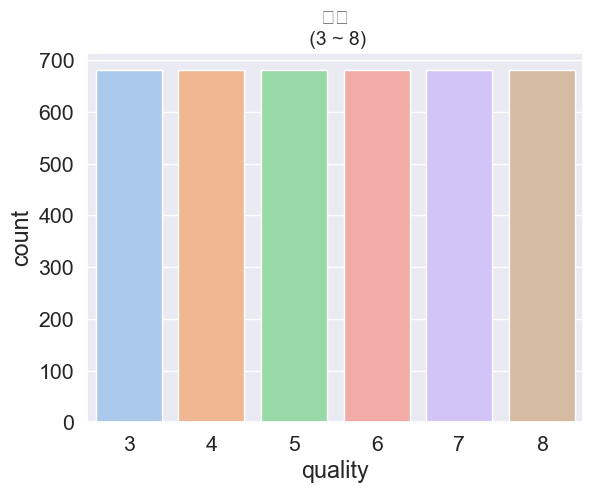

In [19]:
sns.countplot('quality', data=df2, palette="pastel")
plt.title('분류\n (3 ~ 8)', fontsize=14)

In [20]:
train_cols = df.columns[0:11] # 0~10 필드
X = X_samp[train_cols] # 독립변수
y = y_samp["quality"]

In [21]:
# 이진분류가 아닌 다분류의 경우는 아래의 코드를 사용합니다.
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = sm.MNLogit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.992520
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 3268
Model:                        MNLogit   Df Residuals:                     3213
Method:                           MLE   Df Model:                           50
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.4460
Time:                        12:04:00   Log-Likelihood:                -3243.6
converged:                       True   LL-Null:                       -5854.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -1.0663      0.128     -8.315      0.000      -1.318      -0.81

In [25]:
# pvalue가 0.05보다 큰 값들을 제거
cols=['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = X_samp[cols]
y = y_samp['quality']
df2 = pd.concat([X,y],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.5734394124847001
검증용: 0.5721271393643031


In [34]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[119,   4,   0,   0,   0,   0],
       [ 25,  67,  31,   6,   3,   1],
       [ 12,  29,  78,  22,   9,   4],
       [  6,  19,  26,  42,  23,  12],
       [  1,   4,   3,  25,  57,  52],
       [  0,   0,   0,   0,  33, 105]], dtype=int64)

In [35]:
df_cm = pd.DataFrame(cm, index=[0, 1, 2, 3, 4, 5], columns=[0, 1, 2, 3, 4, 5])
df_cm

,0,1,2,3,4,5
0,119,4,0,0,0,0
1,25,67,31,6,3,1
2,12,29,78,22,9,4
3,6,19,26,42,23,12
4,1,4,3,25,57,52
5,0,0,0,0,33,105


<AxesSubplot:title={'center':'Confusion Matrix'}>

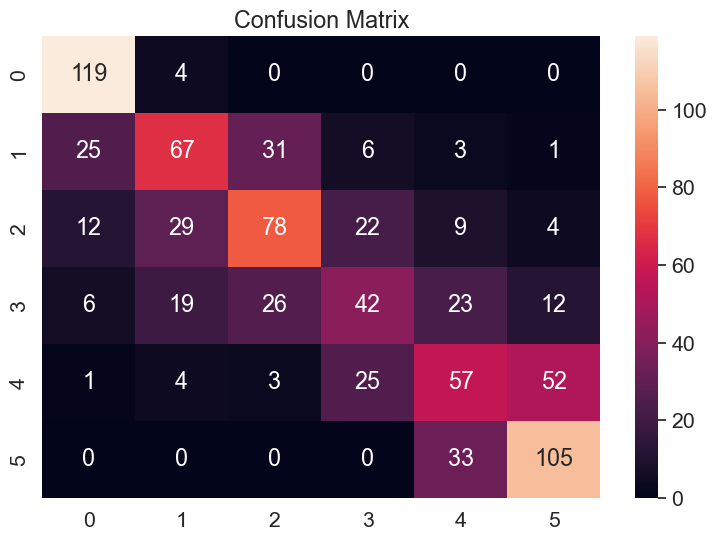

In [36]:
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자